# Examen Módulo 1 - Optimización. <font color=blue>Tipo de examen 1</font>.

**Lea cuidadosamente las siguientes indicaciones antes de comenzar el examen:**
- Para resolver el examen edite este mismo archivo y renómbrelo de la siguiente manera: *Examen1_ApellidoNombre*, donde *ApellidoNombre* corresponde a su apellido paterno con la inicial en mayúscula, seguido de su primer nombre con la inicial en mayúscula **sin acentos**. Por ejemplo, en mi caso el nombre del archivo sería *Examen1_ArellanoCarlos*.
- Resuelva los puntos en el espacio provisto. Si requiere agregar más celdas para código o escritura, hágalo (`Esc`+`B`) o (`Esc`+`A`).
- Recuerde que también se está evaluando su capacidad de interpretar los resultados. Escriba sus interpretaciones/conclusiones en celdas utilizando *Markdown*.
- El formato de presentación de todo el examen en general debe ser adecuado. Use tamaños de letra, colores, etiquetas, etcétera.
- No se resuelven dudas de ningún tipo por los profesores de la asignatura. Por favor, absténgase de preguntar.
- Revise bien el tipo de examen. Sólo se le calificará si realiza el tipo de examen asignado.

---
# Primer punto. Optimización de funciones con `SymPy` (35 puntos)

Considere una cruz simétrica inscrita en un círculo de radio $r$

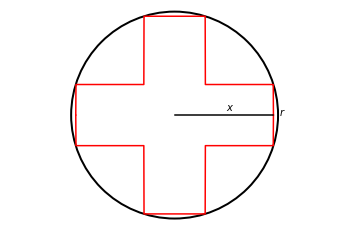

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline

ct = np.cos(0.3)
st = np.sin(0.3)
x = np.linspace(-ct,ct,1000)
y=np.zeros(np.shape(x))
y[1:500] = [st if i < -st else ct for i in x[1:500]]
y[500:999] = [st if i > st else ct for i in x[500:999]]

p = patches.Circle((0, 0), 1,fc='w',lw=2,color='k')
ax = plt.gca()
ax.add_artist(p)
plt.text(1.01,0,'$r$')

plt.plot(x,y,'r')
plt.plot(x,-y,'r')

plt.plot([0,ct],[0,0],'k')
plt.text(0.5,0.05,'$x$')

plt.axis([-1,1,-1,1])
plt.axis('equal')
plt.axis('off')
#plt.tight_layout()
plt.show()

1. Escribir el área $A$ de la cruz como una función de $x$. Realice este punto usando fórmulas de $\LaTeX$, en celdas *Markdown*. (15 puntos)
2. Determinar el valor de $x$ que maximiza el área para un radio $r=3$. (10 puntos)
3. ¿Cuál es el área máxima de la cruz? (10 puntos)

$$ r^2 = x^2 + y^2 $$

$$ x^2 + y^2 = 9 $$

$$ y^2 = 9 - x^2 $$

$$ A = 4x(2y) - (2y)^2 $$

In [25]:
import numpy as np
import sympy as sp
x = sp.var("x")
r = 2

def y(x) :
    return sp.sqrt(r**2-x**2)

def A(x) :
    return 4*x*2*y(x) - (2*y(x))**2

A(x)

4*x**2 + 8*x*sqrt(4 - x**2) - 16

In [26]:
dA = sp.diff(A(x), x)
dA

-8*x**2/sqrt(4 - x**2) + 8*x + 8*sqrt(4 - x**2)

In [27]:
pc = sp.solve(dA, x)
for p in pc :
    print(float(p))

-1.0514622242382672
1.7013016167040798


In [28]:
float(A(pc[1]))

9.888543819998318

---
# Segundo punto. Programación lineal (35 puntos)

Una compañia de aceros produce dos tamaños de tubos: A, B que son vendidos, respectivamente en 10u.m. y 9u.m. por metro. Para fabricar cada metro del tubo A se requieren 0.5 minutos de tiempo de procesamiento sobre un tipo particular de maquina de modelado y cada metro del tubo B requiere 0.6 minutos. Después de la producción, cada metro de tubo, sin importar el tipo requiere 1 onza de material de soldar. El costo total se estima en 3u.m. y 4u.m. por metro de los tubos respectivamente. Para la siguiente semana, la compañía ha recibido pedidos excepcionalmente grandes que totalizan 2000 metros del tubo A y 5000 metros del tubo B. como solo se dispone de 30 horas de tiempo de maquina esta semana y solo se tienen en inventario 3500 onzas de material de soldar, el departamento de producción no podrá satisfacer esta demanda. Como no se espera que continúe esta demanda tan alta, la gerencia esta considerando la compra de algunos de estos tubos a proveedores de Japón a un costo de entrega de 6u.m. por metro del tubo A y 7u.m. por metro del tubo B.

Se desea conocer la cantidad de producción de cada tipo de tubo y la cantidad de compra a Japón para satisfacer la demanda y **maximizar** las ganancias de la compañía (esto es, precio de venta menos costos). La siguiente tabla presenta la información correspondiente.

<table>
  <tr>
      <th>Tubo</th>
      <th>Precio de venta</th>
      <th>Demanda</th>
      <th>Tiempo de máquina</th>
      <th>Material para soldar</th>
      <th>Costo de producción</th>
      <th>Costo de compra</th>
  </tr>
  <tr>
      <th>Tipo A</th>
      <td>10</td>
      <td>2000</td>
      <td>0.5 min</td>
      <td>1 oz/m</td>
      <td>3</td>
      <td>6</td>
  </tr>
  <tr style="border-bottom: 1px solid #000;">
      <th>Tipo B</th>
      <td>9</td>
      <td>5000</td>
      <td>0.6 min</td>
      <td>1 oz/m</td>
      <td>4</td>
      <td>7</td>
  </tr>
  <tr>
      <td>Disponibilidad</td>
      <td></td>
      <td></td>
      <td>30 horas</td>
      <td>3500 oz</td>
      <td></td>
      <td></td>
  </tr>
</table>

1. Escriba la función a **minimizar** junto con las restricciones, explicando detalladamente cada paso (usando fórmulas en $\LaTeX$, en celdas Markdown). Además escriba el problema en la forma \begin{equation}
\begin{array}{ll}
\min_{\boldsymbol{x}} & \boldsymbol{c}^T\boldsymbol{x} \\
\text{s. a. }        & \boldsymbol{A}_{eq}\boldsymbol{x}=\boldsymbol{b}_{eq} \\
                     & \boldsymbol{A}\boldsymbol{x}\leq\boldsymbol{b},
\end{array}\qquad\text{(25 puntos)}
\end{equation}
2. Resuelva el problema utilizando la función `linprog`. ¿Cuántos tubos de cada tipo se deben producir?, ¿Cuántos se deben comprar?, ¿Cuál es la ganancia? (10 puntos)

Función a maximizar

$$ \max{(10-3)x_1 + (9-4)x_2 + (10-6)x_3 + (9-7)x_4} $$

Igual a 

$$ \min{-7x_1 - 5x_2 - 4x_3  - 2x_4} $$


Restricciones

$ 0.5x_1 + 0.6x_2 \leq 1800 $

$ x_1 + x_2 \leq 3500 $

$ x_1 + x_3 \geq 2000 $

$ x_1 + x_3 \leq 2000 $


$ x_2 + x_4 \geq 5000 $

$ x_2 + x_4 \leq 5000 $

In [29]:
import numpy as np
import scipy.optimize as opt

c = np.array([-7,
              -5,
              -4,
              -2])
A = np.array([[ 0.5,  0.6,  0.0,  0.0],
              [ 1.0,  1.0,  0.0,  0.0],
              [-1.0,  0.0, -1.0,  0.0],
              [ 1.0,  0.0,  1.0,  0.0],
              [ 0.0, -1.0,  0.0, -1.0],
              [ 0.0,  1.0,  0.0,  1.0]])
b = np.array([1800,
              3500,
             -2000,
              2000,
             -5000,
              5000])

opt.linprog(c, A, b, method="simplex")

     con: array([], dtype=float64)
     fun: -28000.0
 message: 'Optimization terminated successfully.'
     nit: 7
   slack: array([  0.        , 166.66666667,   0.        ,   0.        ,
         0.        ,   0.        ])
  status: 0
 success: True
       x: array([2000.        , 1333.33333333,    0.        , 3666.66666667])

---
# Tercer punto. Ajuste de curvas (30 puntos)
Los siguientes datos extraidos de la Federal Reserve Economic Data (FRED), son los salarios por empleado equivalente a tiempo completo en industrias privadas de EE.UU.: fondos, fideicomisos, etc. **entre los años 1998 y 2018**. 

https://www.quandl.com/data/FRED/N4461C0A052NBEA-Wage-and-salary-accruals-per-full-time-equivalent-employee-Domestic-private-industries-Funds-trusts-and-other-financial-vehicles

In [1]:
import quandl

quandl.ApiConfig.api_key = 'qoEdK2vzPsx-8ADhs71o'

sal = quandl.get("FRED/N4461C0A052NBEA")

In [8]:
import numpy as np

In [32]:
y=np.array([ 55887.,  59365.,  65435.,  68065.,  71918.,  77257.,  92036.,
        92645.,  99857.,  74935.,  78597.,  83134.,  87372., 104196.,
       112597., 133821., 129107., 138259., 139083., 143762., 147334.])
x = np.arange(8,29)

1. Ajuste los salarios con polinomios de grado 1 a 5 y muestre los errores de forma gráfica, ¿Qué polinómio se ajusta mejor? (20 puntos)
2. Muestre en un gráfico los datos y el polinómio que mejor se ajuste (5 puntos)
3. Use el modelo para averiguar el salario a mediados del año 2005 y para predecirlo en el año 2025. ¿Qué diferencias encuentra en cuanto a la interpolación y la extrapolación? (5 puntos)

In [33]:
import numpy as np
import scipy.optimize as opt
m = x.shape[0]
y = np.reshape(y, [m, -1])
ones = np.ones([m, 1])
x = np.reshape(x, [m, -1]) - np.min(x)
x2 = x**2
x3 = x**3
x4 = x**4
x5 = x**5

def funcion_de_costo(theta, X, y) :
    m, n = X.shape
    theta = np.reshape(theta, [n, -1]) 
    prediccion = X @ theta
    costo = (y - prediccion).T @ (y - prediccion)
    return costo[0][0]

X1 = np.hstack((ones, x))
X2 = np.hstack((ones, x, x2))
X3 = np.hstack((ones, x, x2, x3))
X4 = np.hstack((ones, x, x2, x3, x4))
X5 = np.hstack((ones, x, x2, x3, x4, x5))
t1 = np.random.rand(2)
t2 = np.random.rand(3)
t3 = np.random.rand(4)
t4 = np.random.rand(5)
t5 = np.random.rand(6)

sol1 = opt.minimize(funcion_de_costo, t1, args=(X1, y))
sol2 = opt.minimize(funcion_de_costo, t2, args=(X2, y))
sol3 = opt.minimize(funcion_de_costo, t3, args=(X3, y))
sol4 = opt.minimize(funcion_de_costo, t4, args=(X4, y))
sol5 = opt.minimize(funcion_de_costo, t5, args=(X5, y))

<BarContainer object of 5 artists>

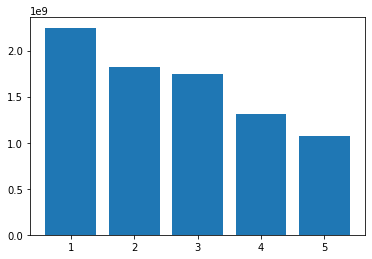

In [34]:
costos = [sol1.fun, sol2.fun, sol3.fun, sol4.fun, sol5.fun]
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()
plt.bar([1, 2, 3, 4, 5], costos)

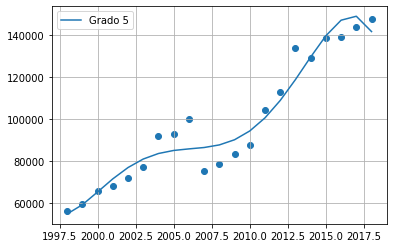

In [35]:
plt.figure()
plt.scatter(x + 1998, y)
plt.plot(x + 1998, X5 @ sol5.x, label="Grado 5")
plt.legend(loc="best")
plt.grid()

In [36]:
np.array([1, 7.5, 7.5**2, 7.5**3, 7.5**4, 7.5**5]) @ sol5.x

85365.58543569449

In [37]:
np.array([1, 27.5, 27.5**2, 27.5**3, 27.5**4, 27.5**5]) @ sol5.x

-849319.4088725679

La interpolación de un modelo con sobreajute es buena, pero debido al sobreajuste no generaliza, entonces la extrapolación es mala.